<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev87_light_gbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Regression Project
Data Set: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) <br>
*\"Can you cut the time a Mercedes-Benz spends on the test bench?\"*

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
#import warnings
#warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
title_font = {"family":"sans-serif", 
              "color":"gray", 
              "size":16, 
              "weight":"bold"}
axis_font = {"family":"sans", 
              "color":"gray", 
              "size":14, 
              "weight":"normal"}

train = pd.read_csv("/content/drive/My Drive/MertColab/proje2/train.csv")
test = pd.read_csv("/content/drive/My Drive/MertColab/proje2/test.csv")

# Let's convert the data of these columns to numeric values.
# e.g a=1, c=3, z=26, aa=27, ac=29, ba=54, bd=57 etc.
from string import ascii_lowercase

for data in (test, train):
    for col in data.columns[1:10]:
        temp = 1
        for var1 in ascii_lowercase:
            var2 = "a" + var1
            var3 = "b" + var1
            data[col] = data[col].replace(var1, temp)
            data[col] = data[col].replace(var2, temp+26)
            data[col] = data[col].replace(var3, temp+26*2)
            temp+=1
        data[col] = data[col].astype("int64")    # data types are also changed.

# Standardization of these numeric values
from sklearn.preprocessing import scale

for col in train.columns[2:10]:
    train[col] = scale(train[col])
    test[col] = scale(test[col])

# REGRESSION MODELS
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

X = train.iloc[:, 2:]
Y = train.y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
results_model = sm.OLS(y_train, x_train)
results_ols = results_model.fit()
print("\nAdjusted R-square value of OLS Model: %.4f" %results_ols.rsquared_adj)

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
lasso_CV = LassoCV(alphas=np.logspace(-1, 10, 10), cv=10).fit(x_train, y_train)
lasso_score = lasso_CV.score(x_train, y_train)
print("Adjusted R-square value of Lasso Model: %.4f" %lasso_score)

ridge_CV = RidgeCV(alphas=np.logspace(-4, 100, 10), cv=10).fit(x_train, y_train)
ridge_score = ridge_CV.score(x_train,y_train)
print("Adjusted R-square value of Ridge Model: %.4f" %ridge_score)

elasticNet_CV = ElasticNetCV(alphas=np.logspace(-6, 100, 20), l1_ratio=0.5, cv=10).fit(x_train, y_train)
elasticNet_score = elasticNet_CV.score(x_train, y_train)
print("Adjusted R-square value of ElasticNet Model: %.4f" %elasticNet_score)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Adjusted R-square value of OLS Model: 0.5575
Adjusted R-square value of Lasso Model: 0.5386
Adjusted R-square value of Ridge Model: 0.5915
Adjusted R-square value of ElasticNet Model: 0.5913


***
# Ödev 8.7 - Light GBM ile Boosting (Project 2)

In [2]:
import lightgbm as lgb
# regressor:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

x_train.drop("const", inplace=True, axis="columns")

In [ ]:
project2_dataset = lgb.Dataset(data=x_train, label=y_train)
parameters = {"boosting_type":"gbdt", 
              "objective":"regression", 
              "metric":"rmsle", 
              "max_depth":4, 
              "silent":False,
              "n_jobs":-1, 
              "colsample_bytree":0.3,
              "learning_rate":0.1, 
              "min_child_weight":0.003, 
              "n_estimators":100}

lgb_reg = lgb.train(params=parameters,
                    train_set=project2_dataset, 
                    num_boost_round=100)

y_predict_train = lgb_reg.predict(x_train)
y_predict_test = lgb_reg.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print("Root Mean Squared Error: %.2f" % rmse)

Root Mean Squared Error: 8.05


In [ ]:
%%time
lgb_reg_gridModel = lgb.LGBMRegressor(random_state=42)
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html
parameters = {"boosting_type":["gbdt"], 
              "objective":["regression"], 
              "metric":["rmsle"], 
              "max_depth":[2], 
              "silent":[False],
              "n_jobs":[-1], 
              "colsample_bytree":[1],
              "learning_rate":[0.1], 
              "min_child_weight":[0.003], 
              "n_estimators":[50, 100], 
              "reg_alpha":[0, 1, 10, 50],
              "reg_lambda":[0, 1, 10, 50]}
grid_cv = GridSearchCV(estimator=lgb_reg_gridModel, param_grid=parameters, cv=5)
grid_cv.fit(x_train, y_train)
y_predict_test = grid_cv.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print("Best parameters  :", grid_cv.best_params_)

Best parameters  : {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'metric': 'rmsle', 'min_child_weight': 0.003, 'n_estimators': 100, 'n_jobs': -1, 'objective': 'regression', 'reg_alpha': 10, 'reg_lambda': 10, 'silent': False}
CPU times: user 40.1 s, sys: 685 ms, total: 40.8 s
Wall time: 24.5 s


In [ ]:
print(f"Root Mean Squared Error : {rmse:.3f}")
print(f"Best train score : {grid_cv.score(x_train, y_train):.4f}")
print(f"Best test score  : {grid_cv.score(x_test, y_test):.4f}")

Root Mean Squared Error : 7.924
Best train score : 0.5798
Best test score  : 0.5968


In [ ]:
results = pd.DataFrame(grid_cv.cv_results_)
results = results[["param_n_estimators", "param_reg_alpha", 
                   "param_reg_lambda", "mean_test_score"]]
results = results.sort_values(by="mean_test_score", ascending=False)
results.head(10)

,param_n_estimators,param_reg_alpha,param_reg_lambda,mean_test_score
26,100,10,10,0.569441
19,100,0,50,0.569201
24,100,10,0,0.569024
23,100,1,50,0.568997
30,100,50,10,0.568891
18,100,0,10,0.568861
22,100,1,10,0.568770
29,100,50,1,0.568769
17,100,0,1,0.568700
21,100,1,1,0.568621


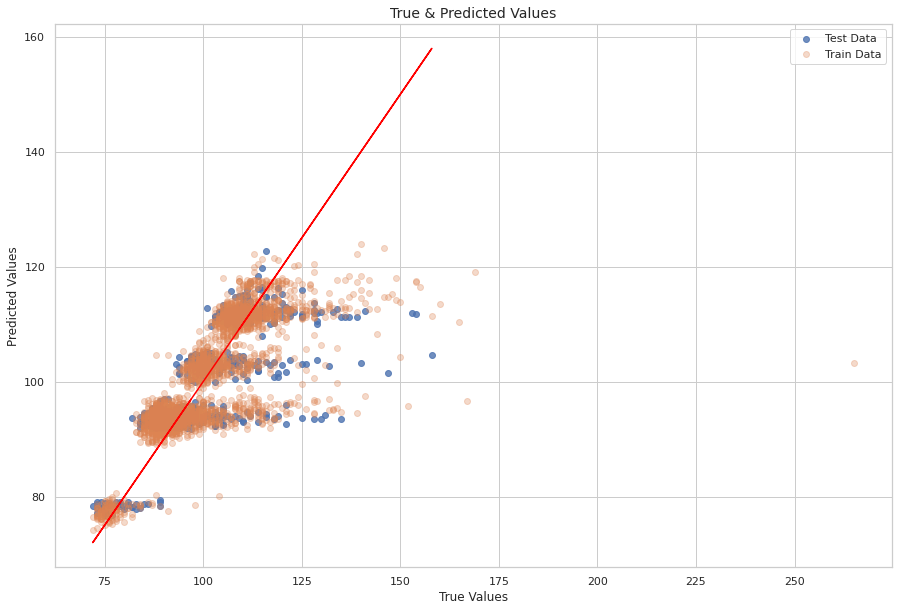

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("True & Predicted Values", size=14)
ax1 = plt.scatter(y_test, y_predict_test, alpha=0.8)
ax2 = plt.scatter(y_train, y_predict_train, alpha=0.3)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ("Test Data", "Train Data"))
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
#plt.ylim((50, 175))
#plt.xlim((50, 175))
plt.show()

---
***
---

# Project 3: Classification Project
Data Set: [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) <br>
*\"Analyze how travelers in February 2015 expressed their feelings on Twitter\"*

In [4]:
%matplotlib inline

# calling our honor guest:
tweets = pd.read_csv("/content/drive/My Drive/MertColab/proje3/tweets.csv")

# ...and she takes off her fancy fur coat and some other unnecessary ornaments 
tweets.drop(columns=["tweet_id", "airline_sentiment_gold", "name", 
                     "negativereason_gold", "retweet_count", "tweet_created", 
                     "tweet_coord", "tweet_created", "tweet_location", 
                     "user_timezone"], 
            inplace=True)

# We are going to clean the tweets to keep only the English words
import re, string, nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

# The twitter accounts mentioned:
set_them = set()
for i in tweets.text:
    search_them = re.search(r"(^|[^@\w])@(\w{1,15})\b", i)
    give_them = search_them.group().lower()
    set_them.add(give_them)
del set_them

# These are the Twitter accounts we will remove:
# @virginamerica, @united, @southwestair, @deltaassist, @usairways, @americanair

def tweet_cleaner(tweet):
    "Symbols, numbers & airline brand cleaner function!"
    # First step: Symbols and numbers are gone:
    cleaned_string = re.sub("[^a-zA-Z]", " ", tweet)

    # Party people here speak only English. No other languages are allowed:
    cleaned_string = " ".join(w for w in nltk.wordpunct_tokenize(cleaned_string) \
         if w.lower() in words)

    # Second step: Putting them to a list:
    cleaned_set = set(cleaned_string.lower().split())
    # Let's get rid of our meaningless one-letter friends: 
    what_to_clean = list(string.ascii_lowercase)
    # ...and some of their drunk buddies:
    what_to_clean.extend(["it", "of", "co", "to", "http"])
    # We don't need any officials in our party as well:
    what_to_clean.extend(["virginamerica", "united", 
                       "southwestair", "deltaassist",
                       "usairways", "americanair"])
    for delete in what_to_clean:
        try:
            cleaned_set.remove(delete)
        except:
            continue    
    return list(cleaned_set)

# We need to convert the "airline_sentiment" to numbers.
for i,j in enumerate(tweets.airline_sentiment.unique()):
    tweets.airline_sentiment = tweets.airline_sentiment.replace(j, i)
tweets.airline_sentiment.astype("int64")

# We are going to collect all the words and give them binary inputs (1 or 0)
# according to their entities in the tweets.
all_words = set()
rows=[]
for i in tweets.index:
    listed_tweet = tweet_cleaner(tweets.text[i])
    rows.append(listed_tweet)
    all_words.update(listed_tweet)

# filling the data frame with binary values according to the words
df_words = pd.DataFrame(0, columns=all_words, index=tweets.index)
for i in tweets.index:
    df_words.loc[i, rows[i]]=1

# it's time to concatenate the data frames
tweets = pd.concat([tweets, df_words], ignore_index=False, axis="columns")

# Linear Regression Models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X = tweets.iloc[:, 6:]
Y = tweets.airline_sentiment
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr_model1 = LogisticRegression(C=0.1, solver="lbfgs", max_iter=300, n_jobs=-1)
lr_model1.fit(x_train, y_train)
train_score_model1 = lr_model1.score(x_train, y_train)
test_score_model1 = lr_model1.score(x_test, y_test)

print("\nTrain score with 'lbfgs' solver: {:.3f}".format(train_score_model1))
print("Test score with 'lbfgs' solver: {:.3f}".format(test_score_model1), "\n")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.

Train score with 'lbfgs' solver: 0.824
Test score with 'lbfgs' solver: 0.789 



***
# Ödev 8.7 - Light GBM ile Boosting (Project 3)

In [5]:
import lightgbm as lgb

In [6]:
%%time
lgb_reg_gridModel = lgb.LGBMClassifier(random_state=42)
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

parameters = {"boosting_type":["gbdt"], 
              "objective":["multiclass"]}
grid_cv = GridSearchCV(estimator=lgb_reg_gridModel, param_grid=parameters, cv=5)
grid_cv.fit(x_train, y_train)
y_predict_test = grid_cv.predict(x_test)
# we need to switch the prediction probabilities to actual predictions:
y_predict_test = [0 if prediction < 0.5 else 1 for prediction in y_predict_test]
rmse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print("Best parameters  :", grid_cv.best_params_)

Best parameters  : {'boosting_type': 'gbdt', 'objective': 'multiclass'}
CPU times: user 38.1 s, sys: 630 ms, total: 38.8 s
Wall time: 22.3 s


In [7]:
print(f"Root Mean Squared Error : {rmse:.3f}")
print(f"Best train score : {grid_cv.score(x_train, y_train):.4f}")
print(f"Accuracy score: {accuracy_score(y_test, y_predict_test):.4f}")
print(f"Best test score  : {grid_cv.score(x_test, y_test):.4f}")

Root Mean Squared Error : 0.949
Best train score : 0.8275
Accuracy score: 0.2391
Best test score  : 0.7804


In [8]:
# with extended parameters
%%time
parameters = {"boosting_type":["gbdt"], 
              "objective":["multiclass"],
              "sub_feature":[0.5], 
              "min_data":[50],
              "max_depth":[2], 
              "silent":[False],
              "n_jobs":[-1], 
              "colsample_bytree":[1],
              "learning_rate":[0.1], 
              "min_child_weight":[0.001], 
              "n_estimators":[100], 
              "reg_alpha":[0, 1, 10],
              "reg_lambda":[0, 1, 10]}
grid_cv = GridSearchCV(estimator=lgb_reg_gridModel, param_grid=parameters, cv=5)
grid_cv.fit(x_train, y_train)
y_predict_test = grid_cv.predict(x_test)
# we need to switch the prediction probabilities to actual predictions:
y_predict_test = [0 if prediction < 0.5 else 1 for prediction in y_predict_test]
rmse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print("Best parameters  :", grid_cv.best_params_)

Best parameters  : {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 0.001, 'min_data': 50, 'n_estimators': 100, 'n_jobs': -1, 'objective': 'multiclass', 'reg_alpha': 0, 'reg_lambda': 0, 'silent': False, 'sub_feature': 0.5}
CPU times: user 1min 37s, sys: 876 ms, total: 1min 38s
Wall time: 1min 13s


In [9]:
print(f"Root Mean Squared Error : {rmse:.3f}")
print(f"Best train score : {grid_cv.score(x_train, y_train):.4f}")
print(f"Accuracy score: {accuracy_score(y_test, y_predict_test):.4f}")
print(f"Best test score  : {grid_cv.score(x_test, y_test):.4f}")

Root Mean Squared Error : 0.918
Best train score : 0.6949
Accuracy score: 0.1646
Best test score  : 0.7063


In [10]:
results = pd.DataFrame(grid_cv.cv_results_)
results = results[["param_n_estimators", "param_reg_alpha", 
                   "param_reg_lambda", "mean_test_score"]]
results = results.sort_values(by="mean_test_score", ascending=False)
results.head(10)

,param_n_estimators,param_reg_alpha,param_reg_lambda,mean_test_score
0,100,0,0,0.692793
3,100,1,0,0.692195
1,100,0,1,0.691683
4,100,1,1,0.691085
2,100,0,10,0.689292
5,100,1,10,0.689207
6,100,10,0,0.687243
7,100,10,1,0.687072
8,100,10,10,0.684340
